In [1]:
import pandas as pd
df = pd.read_csv('heart failure.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

Renaming a column head

In [4]:
df = df.rename({'DEATH_EVENT' : 'death'}, axis = 1)

In [5]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death  
0        0     4      1  
1        0     6      1  
2        1     7      1  
3        0     7      1  
4        0     8      1

Saving edited csv file into device

In [6]:
df.to_csv('New csv.csv')

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='death', ylabel='count'>

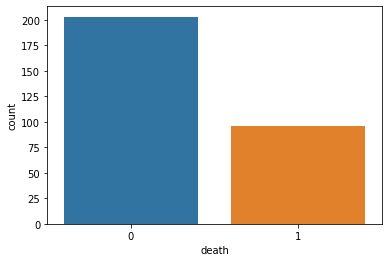

In [8]:
sns.countplot(x = 'death', data = df)

In [9]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [10]:
x = df.drop('death', axis = 1)
y = df.death

In [11]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, train_size= .70, random_state= 42)

In [12]:
ytest.shape

(90,)

In [13]:
xtest.shape

(90, 12)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [15]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [16]:
result = clf.predict(xtest)
result

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [17]:
import numpy as np
np.array(ytest)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [18]:
clf.score(xtest, ytest)

0.6666666666666666

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(ytest, result))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        53
           1       0.61      0.51      0.56        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.65        90
weighted avg       0.66      0.67      0.66        90



In [21]:
con_mat = confusion_matrix(ytest, result)
con_mat

array([[41, 12],
       [18, 19]], dtype=int64)

<AxesSubplot:>

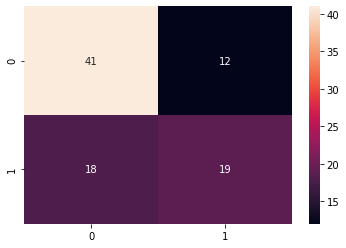

In [22]:
sns.heatmap(con_mat, annot= True)

Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()#Default Parameters

In [24]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [25]:
rfc.score(xtest, ytest)

0.7777777777777778

# Hyper Parameter Tuning

    RandomizedSearchCV
    GridSearchCV(It takes little longer time)


In [26]:
trees = np.random.randint(25, 200, 20)
trees

array([ 36,  88,  84, 181, 119,  52,  47,  60, 115,  56, 156,  60,  94,
        99, 122,  96, 196, 182,  68, 130])

In [27]:
df.shape

(299, 13)

In [28]:
#We'll take all the parameters from random forest Classifier
criterion = ['gini', 'entropy']
max_depth = np.random.randint(1, 15, 20) #We'll set the range of rand by number of features
min_samples_split = [2, 3, 4]
max_features = ['sqrt', 'log2']

In [29]:
#param grids
ids = {
    'n_estimators' : trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features
}

RandomizedSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rcv = RandomizedSearchCV(rfc, ids, n_iter = 50, cv = 3)#In parameters, Criterion means which algoithm I'm using
#n_iter will itterate the process. Here, it will do it, 50 times
#cv means cross validation and here cv = 3 means it will split the data into 3 parts to get 3 accuracy
#since iter is 50 and cv 3, we'll get 150 accuracys
#Here, rcv takes a model and passes different parameters from dds to train rfc

In [31]:
rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 7,  7,  1,  3,  3, 13, 10,  2,  4,  9,  5, 14,  5,  4,  7,  6,  9,
       10, 14,  8]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 36,  88,  84, 181, 119,  52,  47,  60, 115,  56, 156,  60,  94,
        99, 122,  96, 196, 182,  68, 130])})

In [32]:
rcv.cv_results_

{'mean_fit_time': array([0.04100903, 0.12969549, 0.04000886, 0.07935079, 0.0900201 ,
        0.13469656, 0.06501468, 0.03700821, 0.08435218, 0.06501412,
        0.08168499, 0.03900878, 0.06734824, 0.02600582, 0.02600567,
        0.12602806, 0.08835292, 0.0696822 , 0.08968655, 0.03300746,
        0.06134709, 0.12269394, 0.06101346, 0.0476772 , 0.03767482,
        0.04300952, 0.05601247, 0.04901083, 0.10769049, 0.04200935,
        0.04901091, 0.0680151 , 0.05901321, 0.02667268, 0.04767704,
        0.04034225, 0.09168704, 0.0421776 , 0.02600574, 0.03367408,
        0.0430096 , 0.04367638, 0.03534118, 0.06901519, 0.04267621,
        0.03800837, 0.04901067, 0.08868639, 0.06068007, 0.08135128]),
 'std_fit_time': array([1.41439204e-03, 1.70012668e-03, 1.12391596e-07, 4.71651423e-04,
        2.97360213e-07, 4.71426560e-04, 1.12391596e-07, 2.24783192e-07,
        4.71595137e-04, 3.37174788e-07, 4.71482745e-04, 2.24783192e-07,
        2.62535716e-03, 1.12391596e-07, 1.12391596e-07, 1.94667955e-0

Converting the data into a dataframe

In [33]:
cv_result = pd.DataFrame(rcv.cv_results_)
cv_result#Here, split_test_score shows the divided result we get from cv

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.041009  1.414392e-03         0.004334    4.713704e-04   
1        0.129695  1.700127e-03         0.010336    4.715390e-04   
2        0.040009  1.123916e-07         0.004001    1.123916e-07   
3        0.079351  4.716514e-04         0.007669    4.712580e-04   
4        0.090020  2.973602e-07         0.008002    1.123916e-07   
5        0.134697  4.714266e-04         0.011003    1.123916e-07   
6        0.065015  1.123916e-07         0.006001    1.123916e-07   
7        0.037008  2.247832e-07         0.004001    2.247832e-07   
8        0.084352  4.715951e-04         0.007668    4.715390e-04   
9        0.065014  3.371748e-07         0.006002    4.899036e-07   
10       0.081685  4.714827e-04         0.007335    4.715390e-04   
11       0.039009  2.247832e-07         0.004001    1.946680e-07   
12       0.067348  2.625357e-03         0.006001    1.123916e-07   
13       0.026006  1.123916e-07         0.003001    1.946680e-07   
14       0.026006  1.123916e-07         0.003001    0.000000e+00   
15       0.126028  1.946680e-07         0.010002    1.123916e-07   
16       0.088353  4.715390e-04         0.007668    4.715951e-04   
17       0.069682  4.714266e-04         0.006001    1.946680e-07   
18       0.089687  4.711456e-04         0.007668    4.713142e-04   
19       0.033007  1.123916e-07         0.003334    4.714266e-04   
20       0.061347  4.713142e-04         0.006001    1.946680e-07   
21       0.122694  4.716513e-04         0.010170    2.380455e-04   
22       0.061013  0.000000e+00         0.005668    4.714827e-04   
23       0.047677  4.714827e-04         0.017671    1.791741e-02   
24       0.037675  4.714827e-04         0.004001    0.000000e+00   
25       0.043010  0.000000e+00         0.004334    4.716513e-04   
26       0.056012  2.973602e-07         0.005668    4.713142e-04   
27       0.049011  1.123916e-07         0.005001    1.123916e-07   
28       0.107690  4.714827e-04         0.009669    4.715390e-04   
29       0.042009  0.000000e+00         0.004668    4.717075e-04   
30       0.049011  1.123916e-07         0.005001    1.946680e-07   
31       0.068015  1.946680e-07         0.006001    2.247832e-07   
32       0.059013  2.973602e-07         0.006001    1.946680e-07   
33       0.026673  4.714266e-04         0.003001    1.123916e-07   
34       0.047677  4.713704e-04         0.005001    2.247832e-07   
35       0.040342  4.715952e-04         0.004334    4.712580e-04   
36       0.091687  4.715951e-04         0.008002    0.000000e+00   
37       0.042178  6.221213e-04         0.004668    4.714266e-04   
38       0.026006  0.000000e+00         0.003001    1.123916e-07   
39       0.033674  4.714266e-04         0.003668    4.713142e-04   
40       0.043010  1.123916e-07         0.004001    1.946680e-07   
41       0.043676  4.713704e-04         0.004334    4.715390e-04   
42       0.035341  4.715951e-04         0.004001    1.946680e-07   
43       0.069015  8.171187e-04         0.006668    4.714828e-04   
44       0.042676  4.713704e-04         0.004334    4.713704e-04   
45       0.038008  1.123916e-07         0.004001    1.123916e-07   
46       0.049011  1.123916e-07         0.005001    2.247832e-07   
47       0.088686  4.714828e-04         0.008002    0.000000e+00   
48       0.060680  4.714827e-04         0.006002    1.123916e-07   
49       0.081351  4.715390e-04         0.007335    4.714827e-04   

   param_n_estimators param_min_samples_split param_max_features  \
0                  56                       4               sqrt   
1                 182                       2               sqrt   
2                  56                       3               log2   
3                 115                       3               sqrt   
4                 130                       2               sqrt   
5                 196                       2               log2   
6                  94                       4              

Best score and best Parameter

In [34]:
rcv.best_score_

0.8803312629399586

In [35]:
rcv.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'gini'}

Training with best parameters

In [36]:
#This is not an ideal way
rfc2 = RandomForestClassifier(n_estimators = 153, max_features = 'sqrt', max_depth = 14, criterion = 'entropy')
rfc2

RandomForestClassifier(criterion='entropy', max_depth=14, max_features='sqrt',
                       n_estimators=153)

In [37]:
rcv.best_estimator_#since we got the same result, we'll directly fit it

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=4,
                       n_estimators=60)

In [38]:
#Best way to do it
rfc3 = rcv.best_estimator_

In [39]:
rfc3.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=4,
                       n_estimators=60)

In [40]:
rfc3.score(xtest, ytest)

0.7444444444444445

GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(rfc, ids)

In [42]:
gcv.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 7,  7,  1,  3,  3, 13, 10,  2,  4,  9,  5, 14,  5,  4,  7,  6,  9,
       10, 14,  8]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([ 36,  88,  84, 181, 119,  52,  47,  60, 115,  56, 156,  60,  94,
        99, 122,  96, 196, 182,  68, 130])})

In [45]:
gcv_result = pd.DataFrame(gcv.cv_results_)
gcv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.026606  8.002400e-04         0.003001    1.784161e-07   
1          0.062214  4.001141e-04         0.005601    4.899014e-04   
2          0.059613  4.900182e-04         0.005801    3.999710e-04   
3          0.126628  8.001685e-04         0.010402    4.900961e-04   
4          0.083619  4.900961e-04         0.007402    4.900571e-04   
...             ...           ...              ...             ...   
4795       0.070015  1.507891e-07         0.006001    1.507891e-07   
4796       0.140532  4.473983e-04         0.011603    4.900376e-04   
4797       0.130229  4.000903e-04         0.010202    4.001379e-04   
4798       0.049411  4.900766e-04         0.004801    4.000664e-04   
4799       0.093221  4.000664e-04         0.008002    3.162980e-07   

     param_criterion param_max_depth param_max_features  \
0               gini               7               sqrt   
1               gini               7               sqrt   
2               gini               7               sqrt   
3               gini               7               sqrt   
4               gini               7               sqrt   
...              ...             ...                ...   
4795         entropy               8               log2   
4796         entropy               8               log2   
4797         entropy               8               log2   
4798         entropy               8               log2   
4799         entropy               8               log2   

     param_min_samples_split param_n_estimators  \
0                          2                 36   
1                          2                 88   
2                          2                 84   
3                          2                181   
4                          2                119   
...                      ...                ...   
4795                       4                 96   
4796                       4                196   
4797                       4                182   
4798                       4                 68   
4799                       4                130   

                                                 params  split0_test_score  \
0     {'criterion': 'gini', 'max_depth': 7, 'max_fea...           0.738095   
1     {'criterion': 'gini', 'max_depth': 7, 'max_fea...           0.761905   
2     {'criterion': 'gini', 'max_depth': 7, 'max_fea...           0.785714   
3     {'criterion': 'gini', 'max_depth': 7, 'max_fea...           0.761905   
4     {'criterion': 'gini', 'max_depth': 7, 'max_fea...           0.761905   
...                                                 ...                ...   
4795  {'criterion': 'entropy', 'max_depth': 8, 'max_...           0.738095   
4796  {'criterion': 'entropy', 'max_depth': 8, 'max_...           0.761905   
4797  {'criterion': 'entropy', 'max_depth': 8, 'max_...           0.785714   
4798  {'criterion': 'entropy', 'max_depth': 8, 'max_...           0.785714   
4799  {'criterion': 'entropy', 'max_depth': 8, 'max_...           0.785714   

      split1_test_score  split2_test_score  split3_test_score  \
0              0.880952           0.857143           0.809524   
1              0.880952           0.928571           0.785714   
2              0.880952           0.928571           0.785714   
3              0.904762           0.928571           0.809524   
4              0.904762           0.952381           0.809524   
...                 ...                ...                ...   
4795           0.904762           0.952381           0.785714   
4796           0.904762           0.976190           0.785714   
4797           0.904762           0.928571           0.785714   
4798           0.904762           0.928571           0.785714   
4799           0.904762           0.928571           0.785714   

      split4_test_score  mean_test_score  std_test_score  rank_test_score  
0              0.926829         0.842509        0

In [46]:
gcv.best_score_

0.8996515679442509

In [47]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 52}

In [48]:
rfc4 = gcv.best_estimator_

In [49]:
rfc4.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_split=4, n_estimators=52)

In [50]:
rfc4.score(xtest, ytest)

0.7555555555555555